In [20]:
import math

%matplotlib inline

import matplotlib
from matplotlib import pyplot as plt
import numpy as np
from scipy import linalg


from matplotlib import patches, collections

# Using raymarching for SDF object plotting

In [21]:
def sdf_sphere(p: np.ndarray, center: np.ndarray, radius: float) -> float:
    return linalg.norm(p - center, axis=1) - radius

In [22]:
def ray_march(ax, origin: np.ndarray, directions: np.ndarray, max_iteration: int):
    center_sphere_tuple = (1, 1)
    center_sphere = np.array(center_sphere_tuple, dtype=np.float32)
    sphere_radius = 0.5
    distances = np.zeros((directions.shape[0],), dtype=np.float32)
    norm_directions = directions / linalg.norm(directions, axis=1).reshape(-1, 1)
    circle = patches.Circle(center_sphere_tuple, sphere_radius, fill=False, edgecolor="green", linewidth=2)
    ax.add_patch(circle)
        
    for _ in range(max_iteration + 1):
        current_point = origin + norm_directions * distances.reshape(-1, 1)
        curr_dist = sdf_sphere(current_point, center_sphere, sphere_radius)
        new_dir = norm_directions * curr_dist.reshape(-1, 1)
        for i, dist in enumerate(curr_dist):
            circle = patches.Circle(current_point[i], dist, fill=False)
            ax.add_patch(patches.Arrow(current_point[i][0], current_point[i][1], new_dir[i][0], new_dir[i][1], width=0.025))
            ax.add_patch(circle)
            if dist < 1e-3:
                color = "green"
            else:
                color = "red"
            ax.add_patch(patches.Circle(current_point[i], 0.015, fill=True, facecolor=color))
                
        distances += curr_dist
       

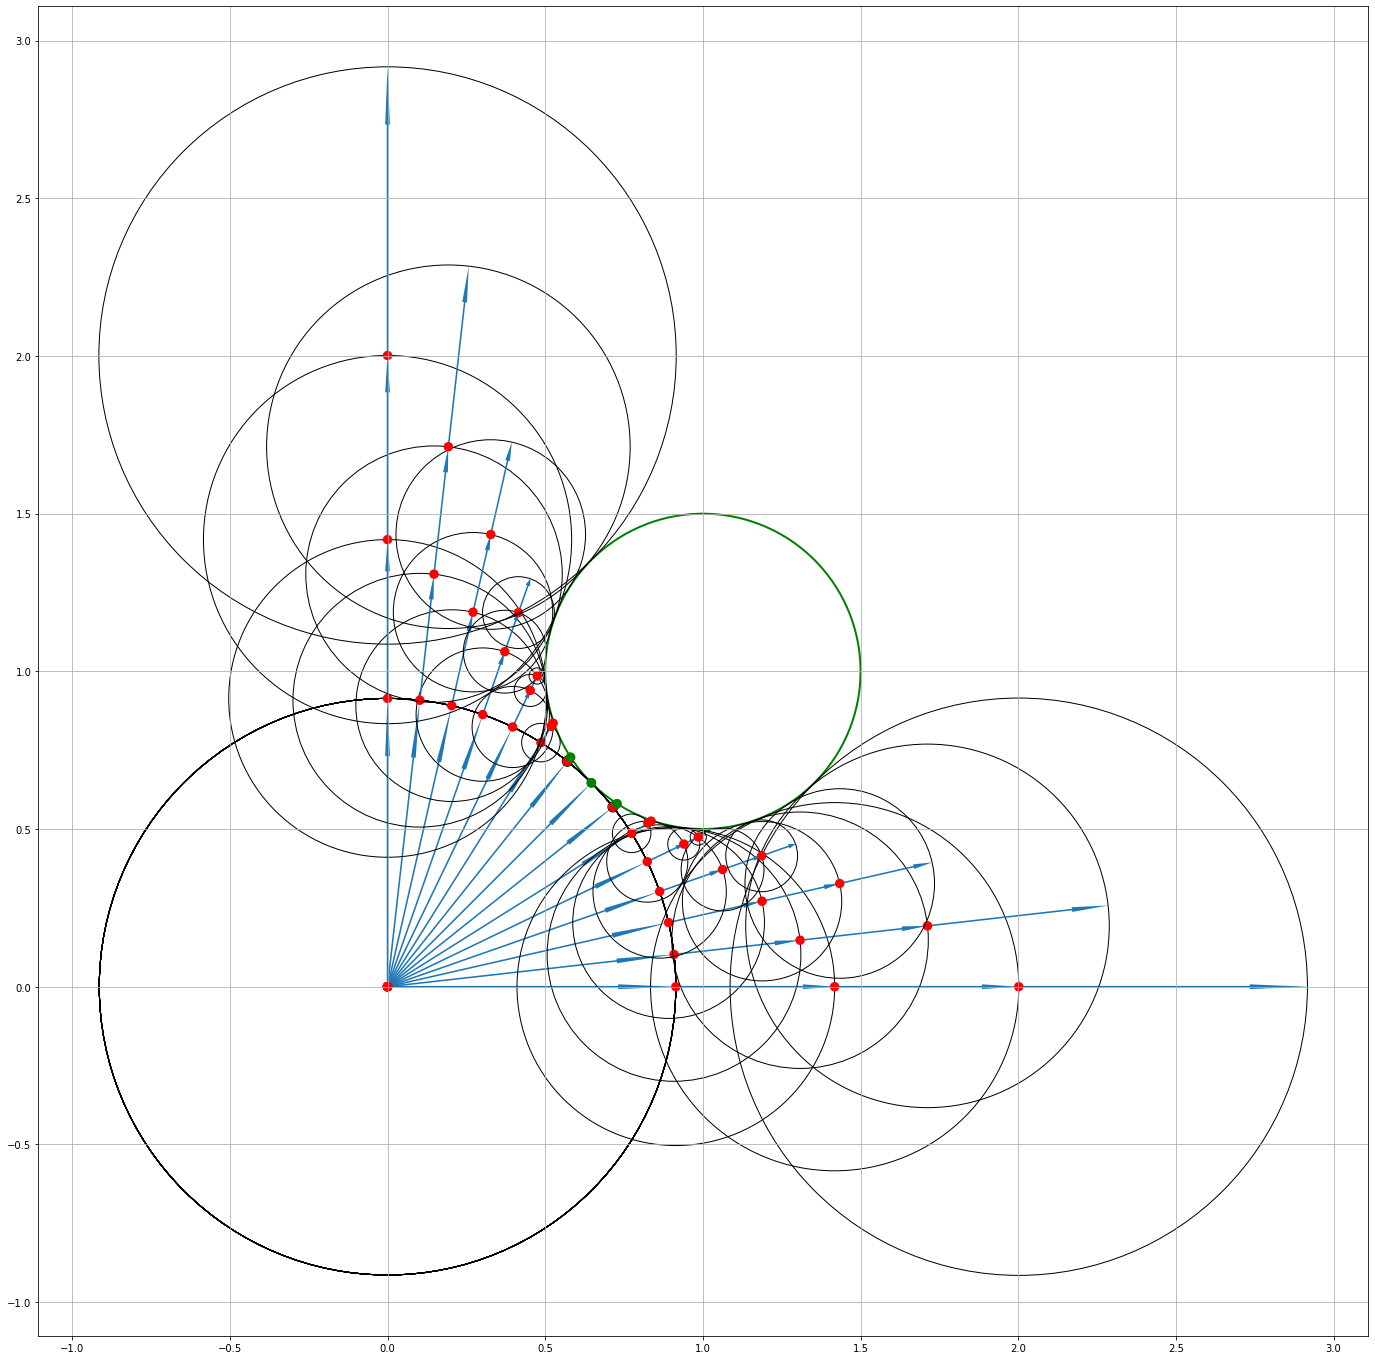

In [27]:
max_iter = 3
figure = plt.figure(figsize=(20, 19))
ax = figure.add_subplot()
origin = np.array((0, 0), dtype=np.float32)

angles = np.linspace(0, np.pi * 0.5, num=15)
directions = np.vstack((np.cos(angles), np.sin(angles))).T

# Red green is point of ovject (sphere)
# Red dot is sample point
ray_march(ax, origin, directions, max_iter)
    
ax.grid(True)
ax.relim()
ax.set_aspect("equal")
ax.autoscale_view()
plt.tight_layout()
plt.show()